# CollabMP3

### Connecting Spotify

In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.5/238.5 KB 25.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

birdy_uri = 'spotify:artist:6XyY86QOPPrYVGvF9ch6wz'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id='808325297aab40ae95147c06419ed138', client_secret='0c85b6d7358a4f7194788d0a87ddfb10'))

results = spotify.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Hybrid Theory (20th Anniversary Edition)
One More Light Live
One More Light Live
One More Light
The Hunting Party: Acapellas + Instrumentals
The Hunting Party
The Hunting Party
RECHARGED
LIVING THINGS: Acapellas and Instrumentals
LIVING THINGS
A Thousand Suns Live Around the World
Minutes to Midnight Live Around the World
Meteora Live Around the World
Hybrid Theory Live Around the World
A Thousand Suns
A Thousand Suns
A Thousand Suns (Bonus Edition)
A Thousand Suns
A Thousand Suns
Road to Revolution (Live at Milton Keynes)
Road to Revolution (Live at Milton Keynes)
Minutes to Midnight
Minutes to Midnight
Minutes to Midnight
Minutes To Midnight
Minutes to Midnight
Minutes to Midnight
Minutes to Midnight
Minutes to Midnight (Deluxe Edition)
Minutes to Midnight (Deluxe Edition)
Minutes to Midnight
Live in Texas
Meteora (Bonus Edition)
Meteora (Bonus Edition)
Meteora
Reanimation
Reanimation
Reanimation
Reanimation
Reanimation
Hybrid Theory (Int'l Only DMD w/ Altered iLiner)
Hybrid Theory (

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

lz_uri = 'spotify:artist:6XyY86QOPPrYVGvF9ch6wz'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id='2e01fb70abfd40ae8b2a5c6d26b14342',
        client_secret= 'c83aaf8534e5452a9db69971fb83a666',))
results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : In the End
audio    : https://p.scdn.co/mp3-preview/91f72a7835abc272a11f9e659ef71234bb476000?cid=2e01fb70abfd40ae8b2a5c6d26b14342
cover art: https://i.scdn.co/image/ab67616d0000b273e2f039481babe23658fc719a

track    : Numb
audio    : https://p.scdn.co/mp3-preview/de3bfecab86ee831098a12e412fa39bd2e9d414b?cid=2e01fb70abfd40ae8b2a5c6d26b14342
cover art: https://i.scdn.co/image/ab67616d0000b273b4ad7ebaf4575f120eb3f193

track    : What I've Done
audio    : https://p.scdn.co/mp3-preview/6ddd4170ac6d3a034abd3f8a1c31a5f0e6a24a19?cid=2e01fb70abfd40ae8b2a5c6d26b14342
cover art: https://i.scdn.co/image/ab67616d0000b27346e207de66ba06422897f769

track    : Numb / Encore
audio    : https://p.scdn.co/mp3-preview/1f7814dd953a644eb61be5db2589c27e6e9e361d?cid=2e01fb70abfd40ae8b2a5c6d26b14342
cover art: https://i.scdn.co/image/ab67616d0000b2737282412ad025c14f7039f516

track    : Faint
audio    : https://p.scdn.co/mp3-preview/63ee88bd1be9c08ff762349c781f9dd53cf5b8e3?cid=2e01fb70abfd40ae8b2a5c6d

In [ ]:
cid = "808325297aab40ae95147c06419ed138"
secret = "0c85b6d7358a4f7194788d0a87ddfb10"
username = "f1ohen1s24fvgko7dz28oazt7"
redirect_uri = "https://developer.spotify.com/dashboard/applications/808325297aab40ae95147c06419ed138"

### Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Data Processing

In [ ]:
data = pd.read_csv("SpotifyFeatures.csv")
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,0.611,0.389,99373.0,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,0.246,0.590,137373.0,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,0.952,0.663,170267.0,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,0.703,0.240,152427.0,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.950,0.331,82625.0,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
pd.isnull(data).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          1
acousticness        1
danceability        1
duration_ms         1
energy              1
instrumentalness    1
key                 1
liveness            1
loudness            1
mode                1
speechiness         1
tempo               1
time_signature      1
valence             1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7283 entries, 0 to 7282
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             7283 non-null   object 
 1   artist_name       7283 non-null   object 
 2   track_name        7283 non-null   object 
 3   track_id          7283 non-null   object 
 4   popularity        7282 non-null   float64
 5   acousticness      7282 non-null   float64
 6   danceability      7282 non-null   float64
 7   duration_ms       7282 non-null   float64
 8   energy            7282 non-null   float64
 9   instrumentalness  7282 non-null   float64
 10  key               7282 non-null   object 
 11  liveness          7282 non-null   float64
 12  loudness          7282 non-null   float64
 13  mode              7282 non-null   object 
 14  speechiness       7282 non-null   float64
 15  tempo             7282 non-null   float64
 16  time_signature    7282 non-null   object 


Text(0.5, 1.0, 'Correlation')

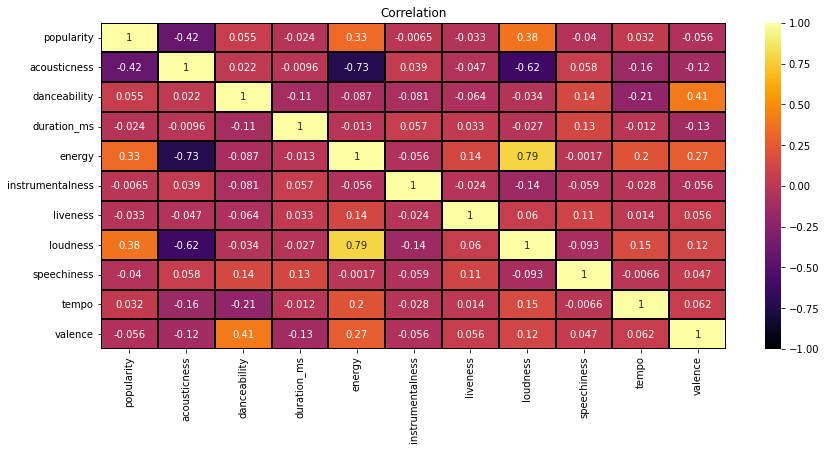

In [ ]:
corr = data.corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation")


### Data Visualization

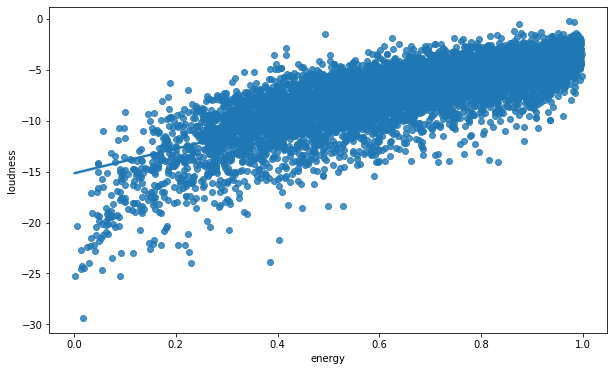

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=data, y="loudness", x="energy")

this is unlcear due to huge dataset, so we need a smaller sample from this

In [ ]:
sample = data.sample(int(0.001*len(data)))
print(len(sample))

7


[Text(0.5, 1.0, 'Loudness vs Energy')]

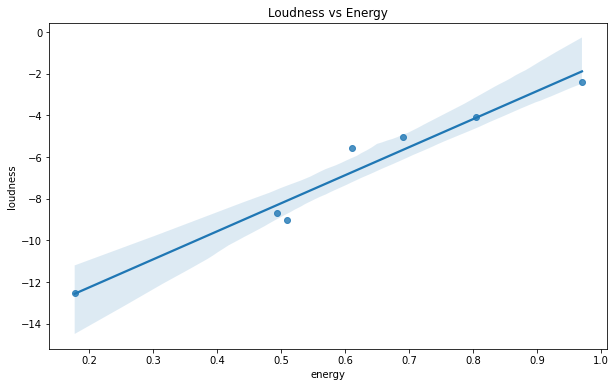

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample, y="loudness", x="energy").set(title="Loudness vs Energy")

[Text(0.5, 1.0, 'Acousticness vs Energy')]

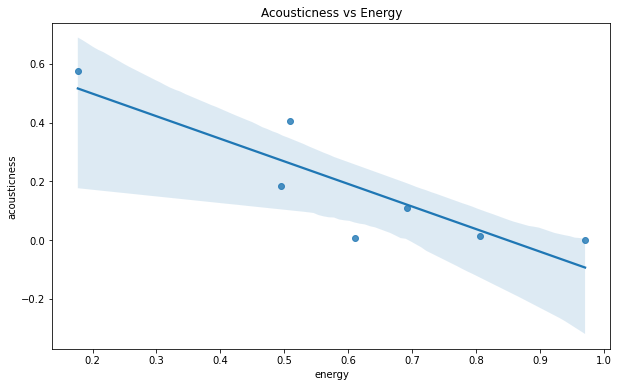

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=sample, y="acousticness", x="energy").set(title="Acousticness vs Energy")

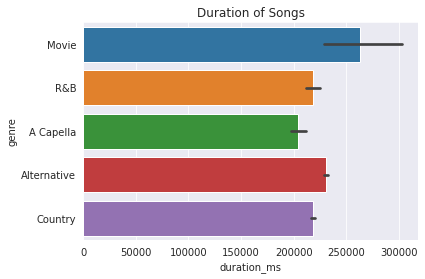

In [ ]:
sns.set_style(style="darkgrid")
plt.title("Duration of Songs")
sns.color_palette("rocket", as_cmap = True)
sns.barplot(y="genre", x="duration_ms", data = data)

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

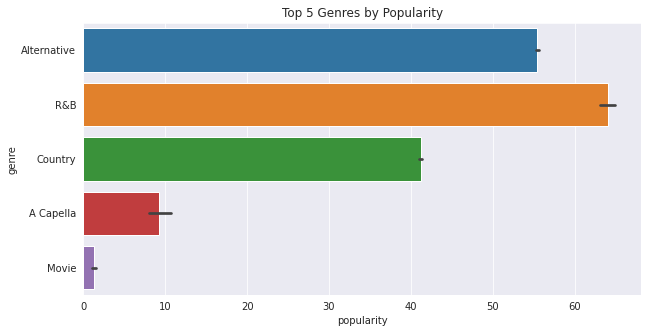

In [ ]:
sns.set_style(style = "darkgrid")
plt.figure(figsize=(10,5))
famous = data.sort_values("popularity", ascending=False)
sns.barplot(y="genre", x="popularity", data = famous).set(title="Top 5 Genres by Popularity")

### Machine Learning

In [ ]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.0,0.611,0.389,99373.0,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1.0,0.246,0.590,137373.0,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3.0,0.952,0.663,170267.0,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.0,0.703,0.240,152427.0,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4.0,0.950,0.331,82625.0,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
